# Grammar dependency notebook
Authors
https://towardsdatascience.com/natural-language-processing-dependency-parsing-cf094bbbe3f7

In [ ]:
!curl https://downloads.cs.stanford.edu/nlp/software/stanford-corenlp-4.2.2.zip -o stanford-corenlp-4.2.2.zip 
!curl https://downloads.cs.stanford.edu/nlp/software/stanford-corenlp-4.2.2-models-english.jar -o stanford-corenlp-4.2.2-models-english.jar
!unzip stanford-corenlp-4.2.2.zip 

In [16]:
# https://web.stanford.edu/~jurafsky/slp3/14.pdf
# https://stanfordnlp.github.io/CoreNLP/index.html    
from nltk.parse import DependencyGraph,ProjectiveDependencyParser,NonprojectiveDependencyParser
from nltk import word_tokenize
from nltk.parse.stanford import StanfordDependencyParser
from nltk.parse.corenlp import CoreNLPServer

In [17]:
# Paths to CoreNLP jar unzipped and model jar
jar_path = 'stanford-corenlp-4.2.2/stanford-corenlp-4.2.2.jar'
models_jar_path = 'stanford-corenlp-4.2.2-models-english.jar'

# Initialize StanfordDependency Parser from the path
parser = StanfordDependencyParser(path_to_jar = jar_path, path_to_models_jar = models_jar_path)



# Parse the sentence
text = 'The monkey is in the tree'

result = parser.raw_parse(text)
dependency = result.__next__()


print ("{:<15} | {:<10} | {:<10} | {:<15} | {:<10}".format('Head', 'Head POS','Relation','Dependent', 'Dependent POS'))
print ("-" * 75)
  
# Use dependency.triples() to extract the dependency triples in the form
# ((head word, head POS), relation, (dependent word, dependent POS))  
for dep in list(dependency.triples()):
  print ("{:<15} | {:<10} | {:<10} | {:<15} | {:<10}"
         .format(str(dep[0][0]),str(dep[0][1]), str(dep[1]), str(dep[2][0]),str(dep[2][1])))

/var/folders/hd/b3xdbhj91fj7d7_gq2f0v1h40000gn/T/ipykernel_39463/1623245449.py:6: DeprecationWarning: The StanfordDependencyParser will be deprecated
Please use nltk.parse.corenlp.CoreNLPDependencyParser instead.
  parser = StanfordDependencyParser(path_to_jar = jar_path, path_to_models_jar = models_jar_path)


Head            | Head POS   | Relation   | Dependent       | Dependent POS
---------------------------------------------------------------------------
tree            | NN         | nsubj      | monkey          | NN        
monkey          | NN         | det        | The             | DT        
tree            | NN         | cop        | is              | VBZ       
tree            | NN         | case       | in              | IN        
tree            | NN         | det        | the             | DT        


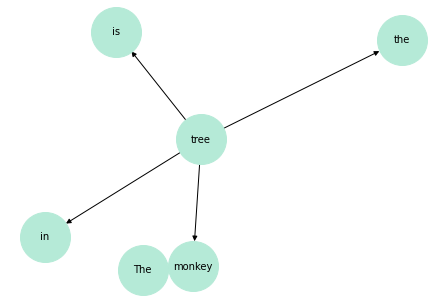

In [18]:
import networkx as nx
import matplotlib.pyplot as plt

G = dependency.nx_graph().reverse()

words = text.split(" ")
labels = {index + 1: words[index] for index in range(len(words))}
nx.draw(G, with_labels=True, labels=labels, node_size=2500, node_color='#B5EAD7', font_size=10)